In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Are the prequels better than the sequels? (Star Wars Survey Data)

So today, we're going to be taking a look at Star Wars survey data coming to us courtesy of FiveThirtyEight.

Our aim is to answer the question: Is it the general public's opinion that the sequels are better than the prequels, or is this not true?

Let's first load in the data and take a look at the head.

In [46]:
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars.iloc[:,9:15].head(10)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3


## Initial analysis

We see two issues right off the bat.

- We see a RespondentID without an ID value. We want to make sure that we can track each ID back to the survey, so let's check how many ID's have NaN values, and then if necessary sequester the non-null values.
- We see the strings 'Yes' and 'No' as the answers for many of the questions; It's best to turn these into True and False.
- We see that Unnamed 4 through 8 are the columns representing what movies in the series each survey participant has watched. Since the formatting of both the columns and the answer column is hard to understand, it's best to go ahead and reformat these columns.
- In a similar vein to the above point, the columns where the participants rank the Star Wars movies need to be reformatted to be easier to understand.

Let's go ahead and tackle these issues one by one.

## Data Cleaning

In [47]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

So it seems like there's only one non null value for RespondentID, so let's go ahead and filter that out.

In [48]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

Now to take care of the mapping of the answers 'Yes' and 'No' to True and False, respectively.

In [49]:
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no) 
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no) 
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no) 
star_wars['Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'] = star_wars['Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'].map(yes_no) 
star_wars['Are you familiar with the Expanded Universe?'] = star_wars['Are you familiar with the Expanded Universe?'].map(yes_no)

star_wars.iloc[:,3:9].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
6,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
7,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
8,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
9,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
10,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN


Finally, we are going to go ahead and reformat the columns expressing which movies the participants have seen.

In [50]:
star_wars['Unnamed: 4']

1       Star Wars: Episode II  Attack of the Clones
2                                               NaN
3       Star Wars: Episode II  Attack of the Clones
4       Star Wars: Episode II  Attack of the Clones
5       Star Wars: Episode II  Attack of the Clones
                           ...                     
1182    Star Wars: Episode II  Attack of the Clones
1183    Star Wars: Episode II  Attack of the Clones
1184                                            NaN
1185    Star Wars: Episode II  Attack of the Clones
1186    Star Wars: Episode II  Attack of the Clones
Name: Unnamed: 4, Length: 1186, dtype: object

In [51]:
dictionary = {"Star Wars: Episode I  The Phantom Menace": True, "Star Wars: Episode II  Attack of the Clones": True, "Star Wars: Episode III  Revenge of the Sith": True, "Star Wars: Episode IV  A New Hope": True, "Star Wars: Episode V The Empire Strikes Back": True, "Star Wars: Episode VI Return of the Jedi": True, np.nan:False}
ep_num = 1
for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].map(dictionary)
    star_wars = star_wars.rename(columns = {i:"seen_"+ str(ep_num)})
    ep_num += 1


Now let's take care of reformatting the movie ranking columns (9 thru 15).

In [52]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [53]:
dictionary = {}
dictionary_index = 1
for i in star_wars.columns[9:15]:
    dictionary[i] = "ranking_" + str(dictionary_index)
    dictionary_index += 1

star_wars = star_wars.rename(columns = dictionary)

So now let's take a look at the reformatted columns:

In [54]:
star_wars.iloc[:,9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Much better. Now that we have the rankings formatted, we can ask the question of whether or not the survey participants enjoyed the sequels better or not!

# Results Analysis

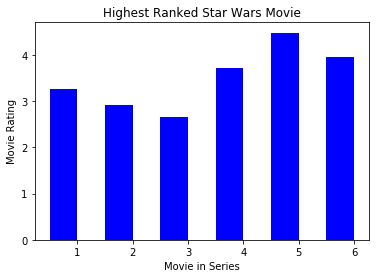

In [55]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

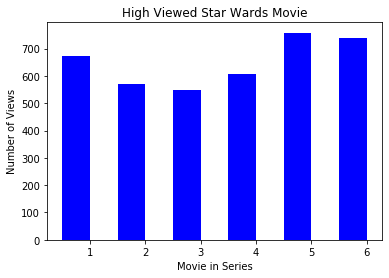

In [56]:
bar_heights = star_wars[star_wars.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_title('High Viewed Star Wards Movie')
ax.set_xlabel('Movie in Series')
ax.set_ylabel('Number of Views')

plt.show()

## Discussion

I think, given the popularity rankings for each film, that the most popular films also tend to be the most viewed in the series. More people have seen The Phantom Menace than A New Hope, which makes sense given the fact that The Phantom Menace came out after the prequels had already been out for many years, giving it substantial hype. In addition, The New Hope was the first Star Wars film EVER so it might not have caught on until The Empire Strikes Back.

# Result Analysis (Fans of Series Only)

In [57]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]

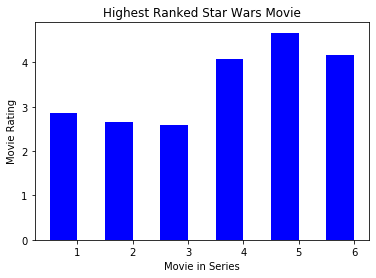

In [59]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars_fans.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

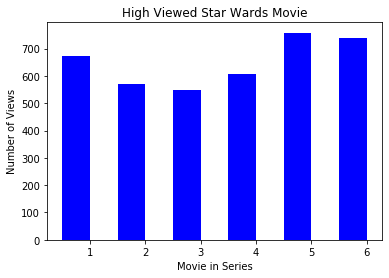

In [60]:
bar_heights = star_wars[star_wars_fans.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width)
ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_title('High Viewed Star Wards Movie')
ax.set_xlabel('Movie in Series')
ax.set_ylabel('Number of Views')

plt.show()

## Discussion

Aha! So people who identified as fans tend to rank the prequels higher than the sequels, and within the sequels, The Empire Strikes Back is the highest rated.

# # Result Analysis (NOT Fans of Series Only)

In [61]:
star_wars_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

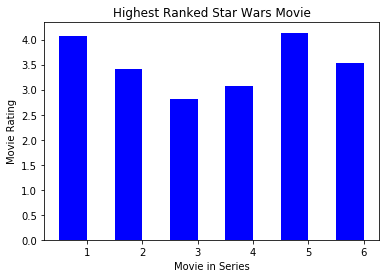

In [64]:
fig, ax = plt.subplots()
bar_heights = (7-star_wars_fans.mean()[9:15])
bar_positions = np.arange(6) + 0.75
width = 0.5

plot = ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_ylabel('Movie Rating')
ax.set_xlabel('Movie in Series')
ax.set_title('Highest Ranked Star Wars Movie')
plt.show()

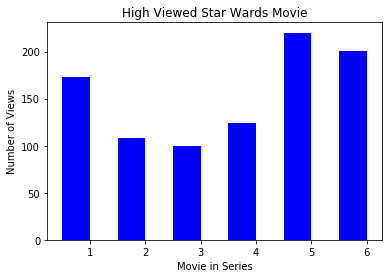

In [65]:
bar_heights = star_wars_fans[star_wars_fans.columns[3:9]].sum()
bar_positions = np.arange(6) + 0.75
width = 0.5

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, width, color = 'b')
ax.set_title('High Viewed Star Wards Movie')
ax.set_xlabel('Movie in Series')
ax.set_ylabel('Number of Views')
plt.show()

## Discussion

The first three movies are rated much higher by fans who aren't necessarily fans of the series. Despite this, it's important to note that sequels 5 and 6 are still the most viewed movies in the series among this demographic.

# Results

So it seems the question of whether or not the sequels are better, are divided based on whether survey participants are fans of the series or not. To put it simply:

**Fan of Series**: Prequels are **best**!

**Not Fan of Series**: Prequels and sequels are **tied**!

# Further investigation

There are many more possible ways to investigate the data based on the columns. Here are a few:

- Looking only at fans of the extended universe
- Sequestering different age and location demographics and investigating the rest.
- Whether or not the participants are fans of the Star Trek franchise

Until next time!